<a href="https://colab.research.google.com/github/Jgallear/CSSP_brazil_23_24/blob/main/vars_gc_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# plot monthly coefficient of variation per grid cell
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 21.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
from sklearn.inspection import PartialDependenceDisplay
from shapely.geometry import Point
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
#from rasterio import CRS
from shapely.geometry import mapping
import xarray as xr
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import Ridge
import functools
import pickle
import cartopy.feature as cf
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import tensorflow as tf
import itertools
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/VHI_spei_rzsm_dataset.csv')
print(df)

           lon     lat      vhi-1   precip-1      rzsm-1  spei1-1m  spei2-1m  \
0      -53.375 -32.125  70.414172  259.20056   98.021910  2.192168  1.313241   
1      -53.375 -32.125  79.323750  146.58607   98.162980  1.228278  2.453098   
2      -53.375 -32.125  77.111895  184.82845   97.594270  1.472914  1.588110   
3      -53.375 -32.125  64.150561  108.86273   97.605330  1.680747  1.751371   
4      -53.375 -32.125  54.270359  145.90760  100.000000  1.641170  1.900034   
...        ...     ...        ...        ...         ...       ...       ...   
577682 -47.625  -0.875  41.102345  170.38158   66.929490  0.324701  0.572972   
577683 -47.625  -0.875  49.922513  294.35620   80.138200  1.130223  0.881931   
577684 -47.625  -0.875  52.101102  125.48111   88.888840  2.664571  2.250521   
577685 -47.625  -0.875  46.753572   24.13338   77.834076  2.523025  3.002636   
577686 -47.625  -0.875  48.627606   71.58264   69.860950  1.286047  2.275886   

        spei3-1m   spi01-1   spi02-1   

In [ ]:
def groupby_gc(df):
  df_list=[]
  for index,df in df.groupby(['lat','lon']):
    df_list.append(df)
  return df_list

In [ ]:
# Get coefficient of variation per grid cell (CV is SD / mean)
def grid_cell_cv(df):
  df_list = groupby_gc(df)
  cv_df_list=[]
  # loop through df_list get coefficent of variations
  lat_list=[]
  lon_list=[]
  for i in range(len(df_list)):
    # for each column
    cols = df_list[i].columns
    devs = []
    cv_4_cols=[]
    lat_list.append(df_list[i].reset_index()['lat'].values[0])
    lon_list.append(df_list[i].reset_index()['lon'].values[0])
    for j in range(len(cols)):
      # standard deviation of each column
      col_std = np.std(df_list[i][cols[j]])
      col_mean = np.mean(df_list[i][cols[j]])
      col_cv = col_std / col_mean
      cv_4_cols.append(col_cv)
      # determine column
    cv_4_cols_array = np.asarray(cv_4_cols).reshape(1,17)
    print(cv_4_cols_array)
    print(cv_4_cols_array.shape)
    cv_dfi = pd.DataFrame(cv_4_cols_array,columns=cols)
    cv_df_list.append(cv_dfi)
  cv_df = pd.concat(cv_df_list)
  # now remove pointless lat and lon  columns but add back in useful lat and lon
  cv_df.drop(columns=['lat','lon','year','month'],inplace=True)
  # put lat lon keys into df
  cv_df['lat'] = lat_list
  cv_df['lon'] = lon_list
  return cv_df




In [ ]:
cv_df = grid_cell_cv(df)

Streaming output truncated to the last 5000 lines.
   3.79354148e-01]]
(1, 17)
[[-0.00000000e+00 -0.00000000e+00  3.43057025e-01  1.34963966e+00
   8.10645153e-01 -2.52180323e+00 -2.16466165e+00 -2.09391557e+00
  -1.28324906e+01 -7.61248330e+00 -5.99781184e+00 -1.93348836e-01
   4.63961242e-02  5.70020767e-03  5.21277114e-01  2.71098799e-03
   3.42996496e-01]]
(1, 17)
[[-0.00000000e+00 -0.00000000e+00  4.34658425e-01  1.28334090e+00
   8.47479465e-01 -2.54766423e+00 -2.17382534e+00 -2.08885739e+00
  -1.28324906e+01 -7.61248330e+00 -5.99781184e+00 -2.05389164e-01
   4.29595801e-02  5.73641530e-03  5.21277114e-01  2.71098799e-03
   4.34567120e-01]]
(1, 17)
[[-0.00000000e+00 -0.00000000e+00  4.70209703e-01  1.30686082e+00
   7.97933355e-01 -2.42279397e+00 -2.04343933e+00 -1.93813440e+00
  -1.62770773e+01 -1.17725036e+01 -8.94933289e+00 -2.15849988e-01
   3.87640043e-02  5.85722163e-03  5.21277114e-01  2.71098799e-03
   4.70562999e-01]]
(1, 17)
[[-0.00000000e+00 -0.00000000e+00  4.42985419

In [ ]:
print(cv_df)

       vhi-1  precip-1    rzsm-1   spei1-1m   spei2-1m   spei3-1m   spi01-1  \
0   0.278867  0.559449  0.536271  49.822721  16.076240  21.581626  2.818684   
0   0.256986  0.546086  0.544188  49.822721  16.076240  21.581626  2.818684   
0   0.257649  0.541756  0.541806  49.822715  16.076241  21.581627  2.818684   
0   0.269510  0.544304  0.431298  29.241160  12.727191  15.103332  2.456548   
0   0.218430  0.539046  0.420312  24.093841  11.761964  13.617145  2.456548   
..       ...       ...       ...        ...        ...        ...       ...   
0   0.143136  0.643032  0.436257 -16.234040 -19.819484 -22.550010  3.406276   
0   0.151362  0.691118  0.459661 -14.773633 -18.853748 -22.299083  4.746106   
0   0.152194  0.742620  0.468694 -12.941535 -16.174068 -18.571146  4.746106   
0   0.148208  0.783508  0.468516 -12.272021 -15.183268 -17.496585  4.746106   
0   0.134833  0.836536  0.464244 -12.179294 -15.290521 -18.729564  4.746106   

     spi02-1   spi03-1     pev-1  longrad-1     t2m

In [ ]:
fname = '/content/drive/MyDrive/shapefiles/BR/BR_EST_SAD69.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none')

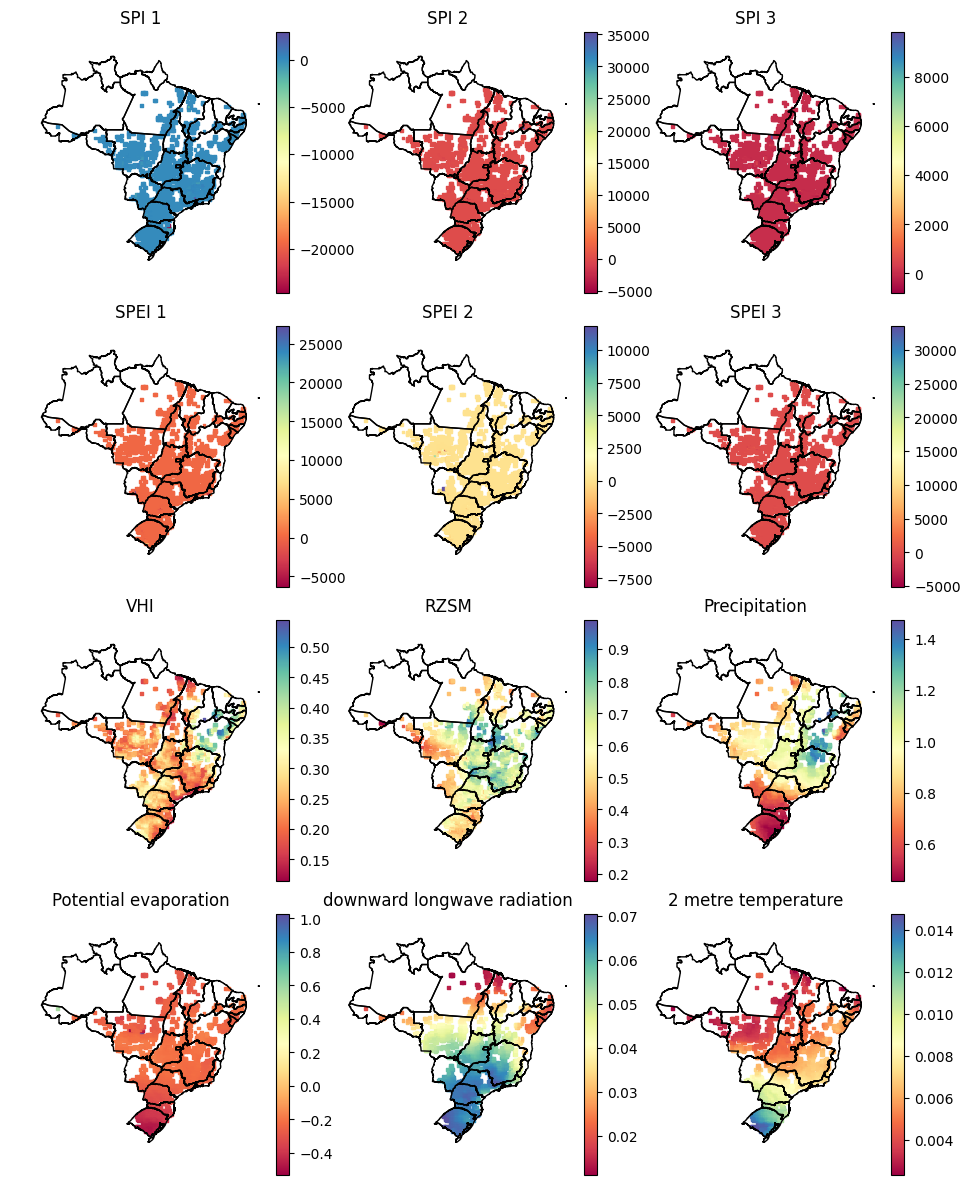

In [ ]:
# Get multipanel Figure

fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(4,3,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['spi01-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.set_title('SPI 1')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['spi02-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.title.set_text('SPI 2')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,3,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['spi03-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.title.set_text('SPI 3')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,4,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['spei1-1m'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.title.set_text('SPEI 1')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,5,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['spei2-1m'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.title.set_text('SPEI 2')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,6,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['spei3-1m'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.title.set_text('SPEI 3')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,7,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['vhi-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.set_title('VHI')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,8,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['rzsm-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.title.set_text('RZSM')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,9,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['precip-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.title.set_text('Precipitation')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,10,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['pev-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.title.set_text('Potential evaporation')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,11,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['longrad-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.title.set_text('downward longwave radiation')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(4,3,12,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['t2m-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('correlation coefficient',fontsize='14')
ax1.title.set_text('2 metre temperature')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.125)
#plt.savefig('/content/drive/MyDrive/Figures/all_comparison_autocorrelation_1month.png',dpi=300)
plt.show()

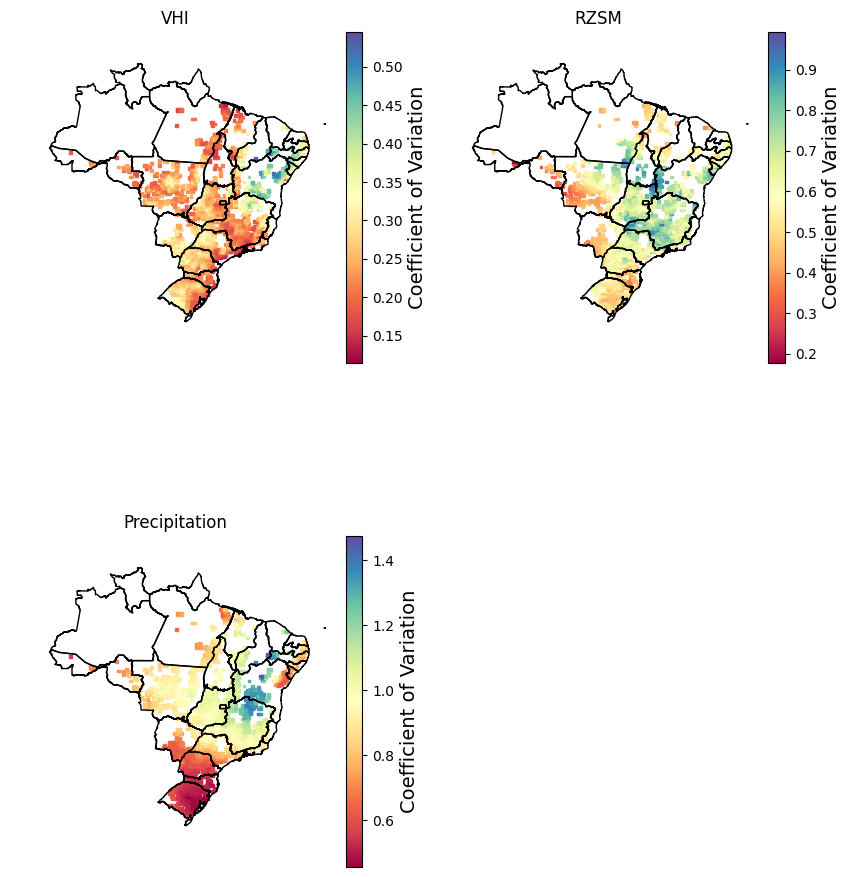

In [ ]:
fig = plt.figure(figsize=(10,12))

ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['vhi-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('Coefficient of Variation',fontsize='14')
ax1.set_title('VHI')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['rzsm-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('Coefficient of Variation',fontsize='14')
ax1.title.set_text('RZSM')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,2,3,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['precip-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('Coefficient of Variation',fontsize='14')
ax1.title.set_text('Precipitation')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

plt.savefig('/content/drive/MyDrive/Figures/coef_variation.png',dpi=300)
plt.show()

In [ ]:
# grid cell mean and coefficient of variation
def grid_cell_mean(df):
  df_list = groupby_gc(df)
  cv_df_list=[]
  # loop through df_list get coefficent of variations
  lat_list=[]
  lon_list=[]
  for i in range(len(df_list)):
    # for each column
    cols = df_list[i].columns
    devs = []
    cv_4_cols=[]
    lat_list.append(df_list[i].reset_index()['lat'].values[0])
    lon_list.append(df_list[i].reset_index()['lon'].values[0])
    for j in range(len(cols)):
      # standard deviation of each column
      col_std = np.std(df_list[i][cols[j]])
      col_mean = np.mean(df_list[i][cols[j]])
      col_cv = col_std / col_mean
      cv_4_cols.append(col_mean)
      # determine column
    cv_4_cols_array = np.asarray(cv_4_cols).reshape(1,17)
    print(cv_4_cols_array)
    print(cv_4_cols_array.shape)
    cv_dfi = pd.DataFrame(cv_4_cols_array,columns=cols)
    cv_df_list.append(cv_dfi)
  cv_df = pd.concat(cv_df_list)
  # now remove pointless lat and lon  columns but add back in useful lat and lon
  cv_df.drop(columns=['lat','lon','year','month'],inplace=True)
  # put lat lon keys into df
  cv_df['lat'] = lat_list
  cv_df['lon'] = lon_list
  return cv_df

In [ ]:
mean_df = grid_cell_mean(df)

Streaming output truncated to the last 5000 lines.
   3.98557433e+01]]
(1, 17)
[[-5.83750000e+01 -1.43750000e+01  5.15245579e+01  1.36464883e+02
   6.48580819e+01 -8.49305035e-02 -1.19005105e-01 -1.43058564e-01
  -7.35036833e-02 -1.30896466e-01 -1.80059939e-01 -4.66147264e-03
   3.84116652e+02  2.96921102e+02  6.07211538e+00  2.01204327e+03
   5.15483953e+01]]
(1, 17)
[[-5.81250000e+01 -1.43750000e+01  5.17746251e+01  1.43312434e+02
   6.48203222e+01 -5.56773177e-02 -7.65447224e-02 -9.01903245e-02
   6.49858056e-03 -3.58566283e-02 -6.06946831e-02 -4.76182262e-03
   3.88513919e+02  2.97450920e+02  6.07211538e+00  2.01204327e+03
   5.17667208e+01]]
(1, 17)
[[-5.78750000e+01 -1.43750000e+01  4.83017392e+01  1.45542944e+02
   6.49415740e+01 -4.87822310e-02 -6.50236458e-02 -7.69029788e-02
   7.45789678e-03 -3.13229308e-02 -5.28754636e-02 -4.77758784e-03
   3.90539249e+02  2.97693686e+02  6.07211538e+00  2.01204327e+03
   4.82755662e+01]]
(1, 17)
[[-5.63750000e+01 -1.43750000e+01  4.72066105

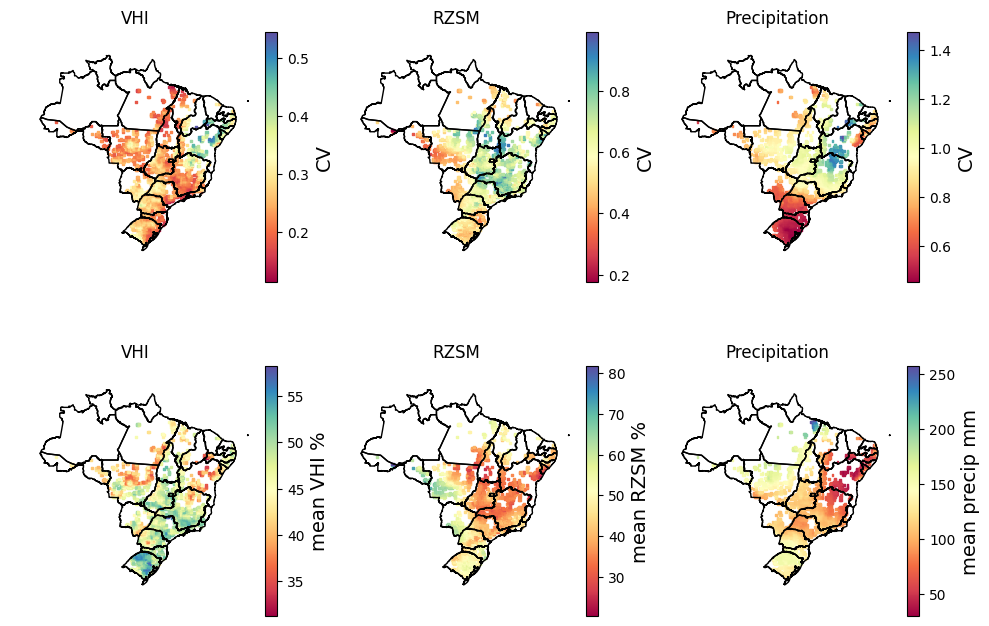

In [ ]:
fig = plt.figure(figsize=(10,12))

ax1 = fig.add_subplot(2,3,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['vhi-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('CV',fontsize='14')
ax1.set_title('VHI')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,3,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['rzsm-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('CV',fontsize='14')
ax1.title.set_text('RZSM')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,3,3,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['precip-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('CV',fontsize='14')
ax1.title.set_text('Precipitation')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

#################################
#################################

ax1 = fig.add_subplot(2,3,4,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(mean_df['lon'], mean_df['lat'], c=mean_df['vhi-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('mean VHI %',fontsize='14')
ax1.set_title('VHI')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,3,5,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(mean_df['lon'], mean_df['lat'], c=mean_df['rzsm-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('mean RZSM %',fontsize='14')
ax1.title.set_text('RZSM')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,3,6,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(mean_df['lon'], mean_df['lat'], c=mean_df['precip-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('mean precip mm',fontsize='14')
ax1.title.set_text('Precipitation')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=-0.6)
plt.savefig('/content/drive/MyDrive/Figures/coef_variation_maps.png',dpi=300)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,12))

ax1 = fig.add_subplot(2,3,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['vhi-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('CV',fontsize='14')
ax1.set_title('VHI')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,3,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['rzsm-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('CV',fontsize='14')
ax1.title.set_text('RZSM')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,3,3,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(cv_df['lon'], cv_df['lat'], c=cv_df['precip-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('CV',fontsize='14')
ax1.title.set_text('Precipitation')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

#################################
#################################

ax1 = fig.add_subplot(2,3,4,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(mean_df['lon'], mean_df['lat'], c=mean_df['vhi-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('mean VHI %',fontsize='14')
ax1.set_title('VHI')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,3,5,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(mean_df['lon'], mean_df['lat'], c=mean_df['rzsm-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('mean RZSM %',fontsize='14')
ax1.title.set_text('RZSM')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,3,6,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(mean_df['lon'], mean_df['lat'], c=mean_df['precip-1'], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=4)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('mean precip mm',fontsize='14')
ax1.title.set_text('Precipitation')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=-0.6)
plt.savefig('/content/drive/MyDrive/Figures/coef_variation_maps.png',dpi=300)
plt.show()